# Clase 19: Loops, funciones y SQL
En esta sesión revisaremos algunos conceptos vistos previamente como loops, funciones, listas, diccionarios, elementos de pandas y gráficos. Vamos a resolver dos aplicaciones en base a estos contenidos. 

## Actividad 1: 
Usando los datos de desempleados, ocupados e informales realizar lo siguiente: 
1. Importar las bases. Revisar si tienen características similares. 
2. Juntar las bases usando algún tipo de join. Mostrar qué dan según los diferentes tipos y elegir el adecuado. 
3. Mostrar el promedio de desocupados y ocupados por año. Guardar en un nuevo DataFrame.  
4. En el DataFrame del punto 2, agregar una columna con la tasa de desempleo (desocupados/(desocupados+ocupados)) y otra columna para la tasa de informalidad (informales/ocupados). 
5. Agregar una columna para mostrar la diferencia y otra para la diferencia porcentual de ocupados por periodo. 
6. Vamos a crear una función que evalúe si los ocupados están bajo o sobre la media.
7. Usando el DataFrame anterior, crear un nuevo set de datos que tenga sólo la llave, ocupados y ocup_cond cuando es verdadero. 
8. Usando for e if mostrar si la tasa de ocupación está bajo o sobre el promedio. 

1. Importar las bases. Revisar si tienen características similares. 

In [1]:
import pandas as pd
df_des = pd.read_excel('/home/felix/Dropbox/Computational_Economics/Intro_python/Data_SQL/Desocupados.ods', )  
# df_des.dtypes
df_ocu = pd.read_excel('/home/felix/Dropbox/Computational_Economics/Intro_python/Data_SQL/Ocupados.ods', )  
# df_ocu.dtypes
df_inf = pd.read_excel('/home/felix/Dropbox/Computational_Economics/Intro_python/Data_SQL/Informal.ods', )  
df_inf.dtypes

Año                   int64
Trimestre            object
Total_formal        float64
Total_informal      float64
Hombres_formal      float64
Hombres_informal    float64
Mujeres_formal      float64
Mujeres_informal    float64
dtype: object

In [2]:
df_des.head()

,Año,Trimestre,Desocupados (Total)
0,2011,Dic - Feb,612.826981
1,2011,Ene - Mar,622.445409
2,2011,Feb - Abr,594.917705
3,2011,Mar - May,604.074497
4,2011,Abr - Jun,598.396488


In [3]:
df_ocu.head()

,Año,Trimestre,Ocupados (Total)
0,2010,Ene - Mar,7156.211576
1,2010,Feb - Abr,7198.777387
2,2010,Mar - May,7181.902888
3,2010,Abr - Jun,7221.575499
4,2010,May -Jul,7256.515676


In [4]:
df_inf.head()

,Año,Trimestre,Total_formal,Total_informal,Hombres_formal,Hombres_informal,Mujeres_formal,Mujeres_informal
0,2017,Jul - Sep,6193.891633,2419.200879,3643.825292,1333.469417,2550.066341,1085.731462
1,2017,Ago - Oct,6168.590625,2454.112893,3639.764667,1354.010989,2528.825959,1100.101904
2,2017,Sep - Nov,6207.712916,2504.968544,3657.915007,1366.333110,2549.797909,1138.635433
3,2017,Oct - Dic,6239.135838,2529.531019,3680.942180,1376.881958,2558.193658,1152.649061
4,2017,Nov - Ene,6309.734180,2484.188455,3727.954628,1349.005126,2581.779552,1135.183329


2. Juntar las bases usando algún tipo de join. Mostrar qué dan según los diferentes tipos y elegir el adecuado. 

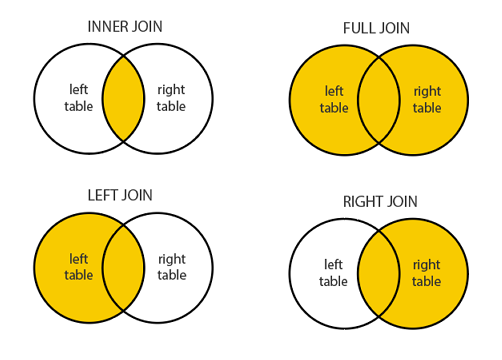

In [5]:
from IPython.display import Image
Image("join_sql.png")

Primero vamos a crear una llave (año-trim), para esto vamos a usar un `left join`. Luego probamos `inner join` y `full join`. 

In [6]:
#Traemos llave
trim = pd.read_excel('/home/felix/Dropbox/Computational_Economics/Intro_python/Data_SQL/trimestres.ods', )  
trim.head()

,Trim,mes
0,Dic - Feb,1
1,Ene - Mar,2
2,Feb - Abr,3
3,Mar - May,4
4,Abr - Jun,5


In [7]:
#Left join: dejamos todo lo de df_des (izquierda) y agregamos el mes
df_des = df_des.merge(trim, left_on="Trimestre", right_on="Trim", how="left")
df_des.head()

,Año,Trimestre,Desocupados (Total),Trim,mes
0,2011,Dic - Feb,612.826981,Dic - Feb,1
1,2011,Ene - Mar,622.445409,Ene - Mar,2
2,2011,Feb - Abr,594.917705,Feb - Abr,3
3,2011,Mar - May,604.074497,Mar - May,4
4,2011,Abr - Jun,598.396488,Abr - Jun,5


In [8]:
#Crear llave: Desocupados
df_des['llave'] = df_des["Año"].astype(str) + "-" + df_des["mes"].astype(str)
#Limpiar columnas
df_des = df_des.drop(columns=['Trimestre', 'Trim'])
df_des = df_des.rename(columns={"Desocupados (Total)": "desoc"})
df_des.head()

,Año,desoc,mes,llave
0,2011,612.826981,1,2011-1
1,2011,622.445409,2,2011-2
2,2011,594.917705,3,2011-3
3,2011,604.074497,4,2011-4
4,2011,598.396488,5,2011-5


In [9]:
#Repetimos para las bases de ocupados y para informales
'''Ocupados'''
df_ocu = df_ocu.merge(trim, left_on="Trimestre", right_on="Trim", how="left")
df_ocu['llave'] = df_ocu["Año"].astype(str) + "-" + df_ocu["mes"].astype(str)
df_ocu = df_ocu.drop(columns=['Trimestre', 'Trim'])
df_ocu = df_ocu.rename(columns={"Ocupados (Total)": "ocupa"})

'''Informales'''
df_inf = df_inf.merge(trim, left_on="Trimestre", right_on="Trim", how="left")
df_inf['llave'] = df_inf["Año"].astype(str) + "-" + df_inf["mes"].astype(str)
df_inf = df_inf.drop(columns=['Trimestre', 'Trim'])

In [10]:
#Chequeamos que está ok
df_ocu.head()

,Año,ocupa,mes,llave
0,2010,7156.211576,2,2010-2
1,2010,7198.777387,3,2010-3
2,2010,7181.902888,4,2010-4
3,2010,7221.575499,5,2010-5
4,2010,7256.515676,6,2010-6


In [11]:
#Caso 1: inner join
df_inner = pd.merge(df_ocu, df_des, on="llave")
df_inner = pd.merge(df_inner, df_inf, on="llave")
df_inner.head()

,Año_x,ocupa,mes_x,llave,Año_y,desoc,mes_y,Año,Total_formal,Total_informal,Hombres_formal,Hombres_informal,Mujeres_formal,Mujeres_informal,mes
0,2017,8613.092511,8,2017-8,2017,647.828960,8,2017,6193.891633,2419.200879,3643.825292,1333.469417,2550.066341,1085.731462,8
1,2017,8622.703518,9,2017-9,2017,647.495338,9,2017,6168.590625,2454.112893,3639.764667,1354.010989,2528.825959,1100.101904,9
2,2017,8712.681459,10,2017-10,2017,626.061755,10,2017,6207.712916,2504.968544,3657.915007,1366.333110,2549.797909,1138.635433,10
3,2017,8768.666857,11,2017-11,2017,610.855783,11,2017,6239.135838,2529.531019,3680.942180,1376.881958,2558.193658,1152.649061,11
4,2017,8793.922635,12,2017-12,2017,644.192655,12,2017,6309.734180,2484.188455,3727.954628,1349.005126,2581.779552,1135.183329,12


In [12]:
#Caso 2: full join
df_outer = pd.merge(df_ocu, df_des, on="llave", how="outer")
df_outer = pd.merge(df_outer, df_inf, on="llave", how="outer")
df_outer.head()

,Año_x,ocupa,mes_x,llave,Año_y,desoc,mes_y,Año,Total_formal,Total_informal,Hombres_formal,Hombres_informal,Mujeres_formal,Mujeres_informal,mes
0,2010,7156.211576,2,2010-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,7198.777387,3,2010-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,7181.902888,4,2010-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,7221.575499,5,2010-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,7256.515676,6,2010-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Mostrar el promedio de desocupados y ocupados por año. Guardar en un nuevo DataFrame.  


In [13]:
ocu_mean = df_outer[["Año_x", "ocupa"]].groupby("Año_x").mean()
des_mean = df_outer[["Año_x", "desoc"]].groupby("Año_x").mean()

print("ocup: ", ocu_mean)
print("desoc: ", des_mean)

ocup:               ocupa
Año_x             
2010   7345.366064
2011   7693.298223
2012   7873.784322
2013   8037.406140
2014   8157.456852
2015   8289.814806
2016   8398.796391
2017   8595.946508
2018   8785.109319
2019   8969.531814
2020   7849.759722
2021   8139.985895
desoc:              desoc
Año_x            
2010          NaN
2011   607.637134
2012   554.747836
2013   524.783979
2014   559.690265
2015   563.728855
2016   601.532554
2017   644.187385
2018   697.860885
2019   700.342872
2020   941.343624
2021   934.795659


4. En el DataFrame del punto 2, agregar una columna con la tasa de desempleo (desocupados/(desocupados+ocupados)) y otra columna para la tasa de informalidad (informales/ocupados). 

In [14]:
df_outer["tasa_des"] = df_outer.desoc/(df_outer.desoc+ df_outer.ocupa)
df_outer["tasa_infor"] = df_outer.Total_informal/(df_outer.ocupa)

df_outer.tail()

,Año_x,ocupa,mes_x,llave,Año_y,desoc,mes_y,Año,Total_formal,Total_informal,Hombres_formal,Hombres_informal,Mujeres_formal,Mujeres_informal,mes,tasa_des,tasa_infor
129,2020,8026.216601,11,2020-11,2020.0,920.263455,11.0,2020.0,5860.907847,2165.308754,3490.594002,1283.150165,2370.313844,882.158589,11.0,0.102863,0.269780
130,2020,8121.419996,12,2020-12,2020.0,925.213793,12.0,2020.0,5921.770235,2199.649761,3526.999418,1289.037217,2394.770817,910.612544,12.0,0.102272,0.270845
131,2021,8167.623309,1,2021-1,2021.0,938.324316,1.0,2021.0,6006.452229,2161.171081,3586.064414,1247.821793,2420.387815,913.349288,1.0,0.103045,0.264602
132,2021,8148.205569,2,2021-2,2021.0,941.088174,2.0,2021.0,5973.674107,2174.531461,3567.113613,1258.942188,2406.560494,915.589274,2.0,0.103538,0.266872
133,2021,8104.128807,3,2021-3,2021.0,924.974488,3.0,2021.0,5980.572116,2123.556691,3565.133756,1237.772701,2415.438361,885.783989,3.0,0.102444,0.262034


5. Agregar una columna para mostrar la diferencia y otra para la diferencia porcentual de ocupados por periodo. 

In [15]:
df_outer["dif_oc"] = df_outer.ocupa.diff()
df_outer["dif_oc_per"] = df_outer.ocupa.pct_change()
df_outer.tail()

,Año_x,ocupa,mes_x,llave,Año_y,desoc,mes_y,Año,Total_formal,Total_informal,Hombres_formal,Hombres_informal,Mujeres_formal,Mujeres_informal,mes,tasa_des,tasa_infor,dif_oc,dif_oc_per
129,2020,8026.216601,11,2020-11,2020.0,920.263455,11.0,2020.0,5860.907847,2165.308754,3490.594002,1283.150165,2370.313844,882.158589,11.0,0.102863,0.269780,109.492980,0.013831
130,2020,8121.419996,12,2020-12,2020.0,925.213793,12.0,2020.0,5921.770235,2199.649761,3526.999418,1289.037217,2394.770817,910.612544,12.0,0.102272,0.270845,95.203395,0.011862
131,2021,8167.623309,1,2021-1,2021.0,938.324316,1.0,2021.0,6006.452229,2161.171081,3586.064414,1247.821793,2420.387815,913.349288,1.0,0.103045,0.264602,46.203314,0.005689
132,2021,8148.205569,2,2021-2,2021.0,941.088174,2.0,2021.0,5973.674107,2174.531461,3567.113613,1258.942188,2406.560494,915.589274,2.0,0.103538,0.266872,-19.417741,-0.002377
133,2021,8104.128807,3,2021-3,2021.0,924.974488,3.0,2021.0,5980.572116,2123.556691,3565.133756,1237.772701,2415.438361,885.783989,3.0,0.102444,0.262034,-44.076762,-0.005409


6. Vamos a crear una función que evalúe si los ocupados están bajo o sobre la media.

In [16]:
def bajo_sobre_media(df_input): 
    df_input.loc[df_input['ocupa'] >= df_input['ocupa'].mean(), 'ocup_cond'] = True
    df_input.loc[df_input['ocupa'] <  df_input['ocupa'].mean(), 'ocup_cond'] = False
    return df_input

df_outer = bajo_sobre_media(df_outer)
df_outer

,Año_x,ocupa,mes_x,llave,Año_y,desoc,mes_y,Año,Total_formal,Total_informal,Hombres_formal,Hombres_informal,Mujeres_formal,Mujeres_informal,mes,tasa_des,tasa_infor,dif_oc,dif_oc_per,ocup_cond
0,2010,7156.211576,2,2010-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2010,7198.777387,3,2010-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.565811,0.005948,False
2,2010,7181.902888,4,2010-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.874500,-0.002344,False
3,2010,7221.575499,5,2010-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.672612,0.005524,False
4,2010,7256.515676,6,2010-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.940177,0.004838,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020,8026.216601,11,2020-11,2020.0,920.263455,11.0,2020.0,5860.907847,2165.308754,3490.594002,1283.150165,2370.313844,882.158589,11.0,0.102863,0.269780,109.492980,0.013831,False
130,2020,8121.419996,12,2020-12,2020.0,925.213793,12.0,2020.0,5921.770235,2199.649761,3526.999418,1289.037217,2394.770817,910.612544,12.0,0.102272,0.270845,95.203395,0.011862,False
131,2021,8167.623309,1,2021-1,2021.0,938.324316,1.0,2021.0,6006.452229,2161.171081,3586.064414,1247.821793,2420.387815,913.349288,1.0,0.103045,0.264602,46.203314,0.005689,False
132,2021,8148.205569,2,2021-2,2021.0,941.088174,2.0,2021.0,5973.674107,2174.531461,3567.113613,1258.942188,2406.560494,915.589274,2.0,0.103538,0.266872,-19.417741,-0.002377,False


7. Usando el DataFrame anterior, crear un nuevo set de datos que tenga sólo la llave, ocupados y ocup_cond cuando es verdadero. 

In [17]:
#Seleccionar un subconjunto de los datos
df_outer[["llave", "ocupa", "ocup_cond"]][df_outer.ocup_cond==True]

,llave,ocupa,ocup_cond
47,2014-1,8202.889793,True
56,2014-10,8207.691840,True
57,2014-11,8249.620400,True
58,2014-12,8259.157930,True
59,2015-1,8263.091077,True
...,...,...,...
117,2019-11,9087.132384,True
118,2019-12,9118.181107,True
119,2020-1,9063.373737,True
120,2020-2,8942.424520,True


8. Usando if y for, mostrar si la tasa de desocupación está bajo o sobre el promedio. 

In [18]:
tasa_des_eval = []
for i in range(len(df_outer.tasa_des)): 
    condicion = df_outer.tasa_des[i] > df_outer.tasa_des.mean()
    if condicion == True: 
        tasa_des_eval.append([df_outer.llave[i], df_outer.tasa_des[i]])

# tasa_des_eval        

In [19]:
tasa_des_eval = {}
for i in range(len(df_outer.tasa_des)): 
    condicion = df_outer.tasa_des[i] > df_outer.tasa_des.mean()
    if condicion == True: 
        tasa_des_eval[df_outer.llave[i]] = df_outer.tasa_des[i]
        
# tasa_des_eval

## Actividad 2
1. Juntar las bases.
2. En un DataFrame mostrar los años y tasa promedio de desocupación, (desocupados/(ocupados+desocupados), la informalidad (formales/ocupados), e informalidad por sexo (ejm: informales_muj/(informales_muj+formales_muj) ). 

    *Ayuda: la lógica a pensar es seleccionar las variables que quiero, agruparlas y sacar el promedio.*

3. Graficar en el eje x año-trimestre (puede ser año-mes) y las series de ocupados, y desocupados. Pueden ocupar matplotlib o plotly. 
4. Al gráfico anterior agrege una línea roja punteada para el promedio de la serie de ocupados y desocupados. (su gráfico va a tener dos líneas punteadas, una para cada serie).
    
    *Ayuda: Dibujen el gráfico en el papel y vean qué necesitan. Con eso en mente, piensen qué datos necesitan, ¿qué tengo que agrupar?*

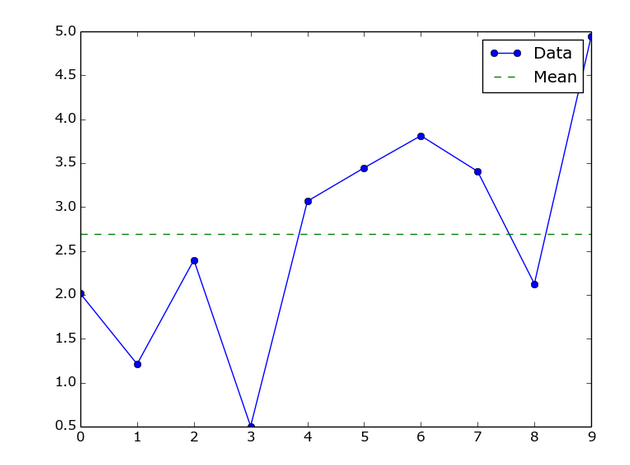

In [20]:
#Ejemplo de +- como se ve un gráfico con el promedio de toda la serie. Uds van a tener que tener dos promedios
Image("ejm_plot_mean.png")

5. Muestre un gráfico de los informales hombres y mujeres, muestre el promedio anual en líneas punteadas rojas (una línea para el promedio anual de hombres y otra para el de mujeres). 

    *Ayuda: Dibujen el gráfico en el papel y vean qué necesitan. Con eso en mente, piensen qué datos necesitan, ¿qué tengo que agrupar?*

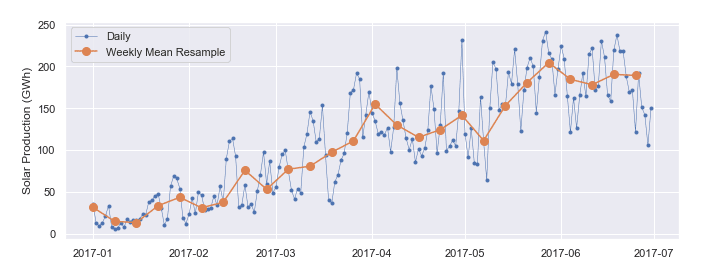

In [21]:
#Ejemplo de +- como se ve un gráfico con el promedio de un subconjunto de los datos. Uds van a tener que tener dos promedios
Image("ejm_plot_mean2.png")

6. Utilizando las ecuaciones de oferta y demanda: 
$$S(q) = q^2 + \beta*10$$
$$D(q) = (q-20)^2$$
El objetivo es crear un gráfico que muestre la oferta para 10 valores de $\beta \in [1,10]$. 
La semana pasada vimos que podemos solucionar este equilibrio con `eq = sy.Eq(S(q), D(q))` y `q_sol = sy.solve(eq)`. Ahora, la ides es usar un `for` para iterar sobre 10 valores de $\beta$ y graficar las ofertas y los puntos de equilibrio (cantidad, precio). 

    *Ayuda: entender los input en la función de oferta es clave, ¿sobre qué vamos a iterar?*

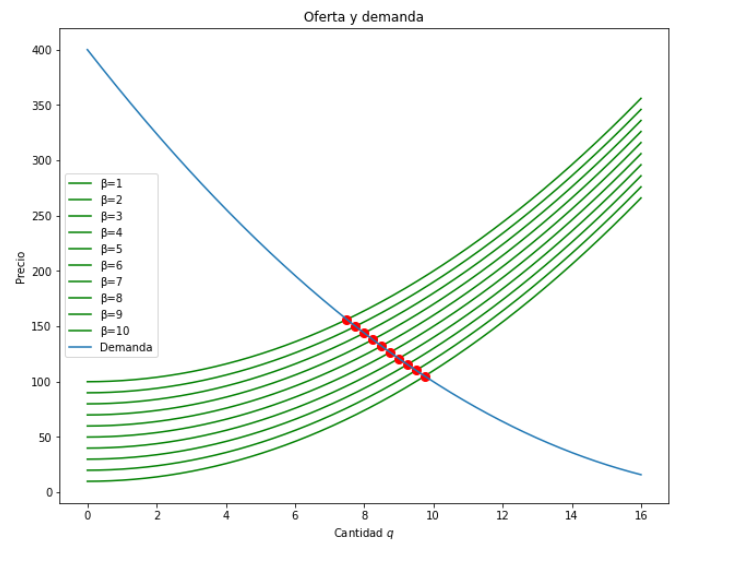

In [22]:
Image("oferta_demanda.png")